In [1]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt

%matplotlib inline

In [82]:
def MCMC_int(func, rng, num_samples, proposal_sigma=1.0):
    xi = np.random.uniform(*rng)
    s  = 0.0
    x = np.array([], dtype=np.float)
    for i in range(num_samples):
        s += func(xi)
        x = np.append(x, xi)
        xg = np.random.uniform(*rng)
        #xg = np.random.normal(xi, proposal_sigma)
        if np.random.uniform(0,1) < func(xg)/func(xi):
            xi = xg
    return s/float(num_samples),x

In [27]:
def g(x):
    return np.exp(-x**2/2)/np.sqrt(2*np.pi)
    #return x*np.exp(-x**2/2)

In [42]:
val, err = integrate.quad(g,-np.inf, np.inf)

In [43]:
val

0.9999999999999998

In [83]:
val, samples = MCMC_int(g, [-10,10],40000)

In [84]:
val

0.2819017859877323

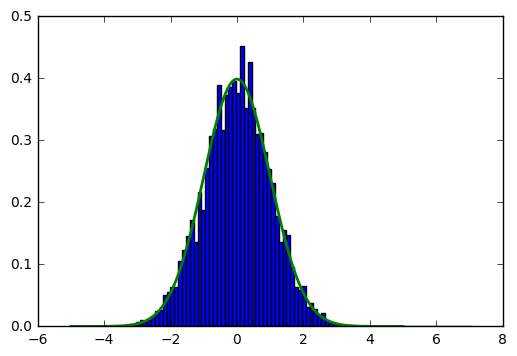

In [86]:
plt.hist(samples, bins=100, normed=True);
x=np.linspace(-5,5,10000)
plt.plot(x, g(x), lw=2)

In [87]:
xlo = 0
xhi = 2
val, err = integrate.quad(g,xlo, xhi)
nsamples = [i*10 for i in range(1,300)]
ivals    = [MCMC_int(g, [xlo, xhi], i)[0] for i in nsamples]

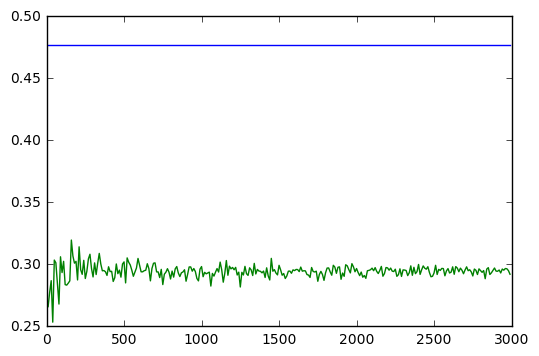

In [88]:
plt.plot([1, nsamples[-1]], [val, val])
plt.plot(nsamples, np.array(ivals))